## K-means project

In [4]:
!pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 6.6 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [19]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# Read data
url='https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw = pd.read_csv(url)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df = df_raw.copy()

In [10]:
# Select columns

df = df[['Latitude', 'Longitude', 'MedInc']]

In [11]:
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [14]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)
df_scale

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -1.14259331],
       [ 1.77823747, -0.87362627, -1.05458292],
       [ 1.75014627, -0.83369581, -0.78012947]])

Assess which is the optimar number of clusters:
- Elbow method
- Silhouette Method

**Elbow method**

In [15]:
# Elbow method to select number of clusters
# Source: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f 
# For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples 
# to the nearest cluster centre

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

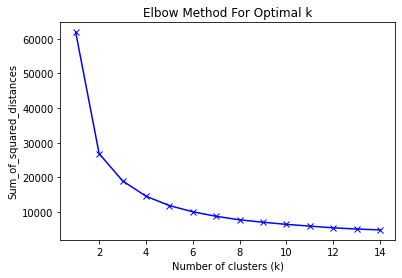

In [16]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**2. Silhouette Method**

In [20]:
rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in rango_n_clusters:
# fit Kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scale)
    cluster_labels = kmeans.labels_
# calcular silhouette
    silhouette_avg.append(silhouette_score(df_scale, cluster_labels))


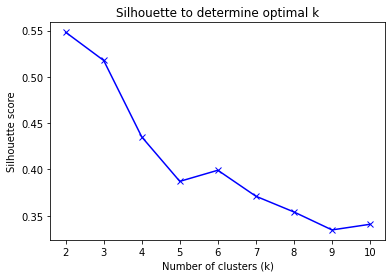

In [21]:
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette to determine optimal k')
plt.show()

Both methods seem to indicadte that optimal k is 2.

In [26]:
kmeans = KMeans(init="random",n_clusters=2, random_state=0, n_init=10,max_iter=300)

kmeans.fit(df_scale)


KMeans(init='random', n_clusters=2, random_state=0)

In [27]:
# Return to the original variables

df_2 = scaler.inverse_transform(df_scale)

In [28]:
# Add column with number of cluster

df_2=pd.DataFrame(df_2,columns=['Latitude','Longitude','MedInc'])

df_2['Cluster'] = kmeans.labels_

df_2

,Latitude,Longitude,MedInc,Cluster
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
 3   Cluster    20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 564.5 KB


In [30]:
# Convert cluster to categorical 
df_2['Cluster'] = pd.Categorical(df_2.Cluster)

**Visualize**

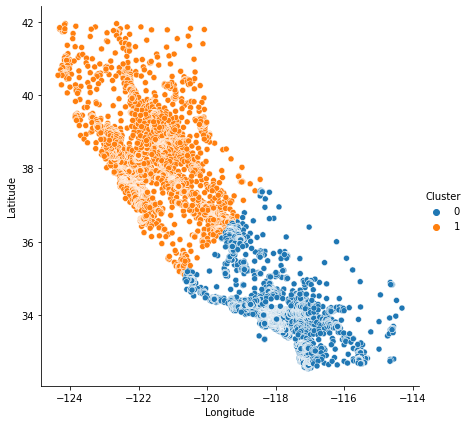

In [31]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=df_2, height=6)

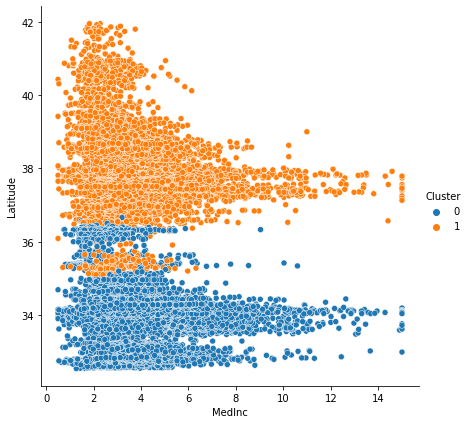

In [32]:
sns.relplot(x="MedInc", y="Latitude", hue="Cluster", data=df_2, height=6)

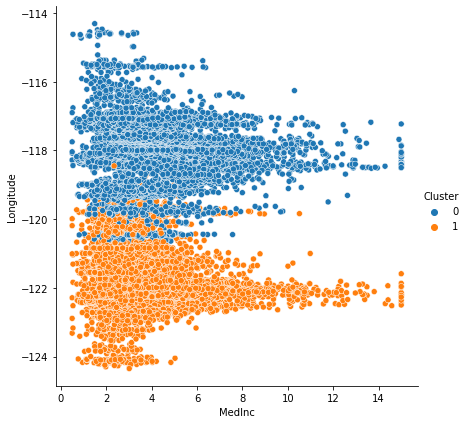

In [33]:
sns.relplot(x="MedInc", y="Longitude", hue="Cluster", data=df_2, height=6)

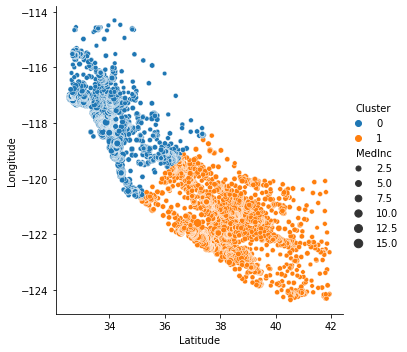

In [35]:
sns.relplot(x='Latitude', y='Longitude', data=df_2, kind='scatter', size = 'MedInc',hue='Cluster')

<AxesSubplot:>

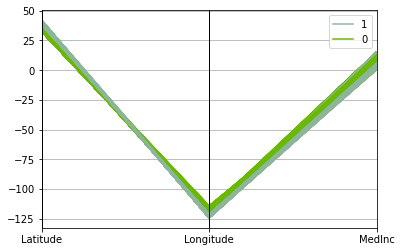

In [34]:
pd.plotting.parallel_coordinates(df_2, 'Cluster')

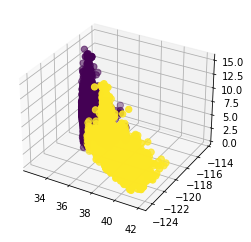

In [36]:
# 3D plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df_2['Latitude'])
y = np.array(df_2['Longitude'])
z = np.array(df_2['MedInc'])

ax.scatter(x,y,z, c=df_2["Cluster"], s=40)

plt.show()

In [37]:
# Apply PCA to latitude and longitude 

X = df_2[['Latitude', 'Longitude']]

pca = decomposition.PCA(n_components=2)

pca.fit(X)

X_prime = pca.transform(X)



In [38]:
print(pca.explained_variance_ratio_)

[0.96249233 0.03750767]


In [39]:
df_pca = pd.DataFrame(data = X_prime
             , columns = ['pca_1', 'pca_2'])

In [40]:
# Add pca_1 of latitude and longitude to df_2

df_2['pca_1'] = df_pca['pca_1']

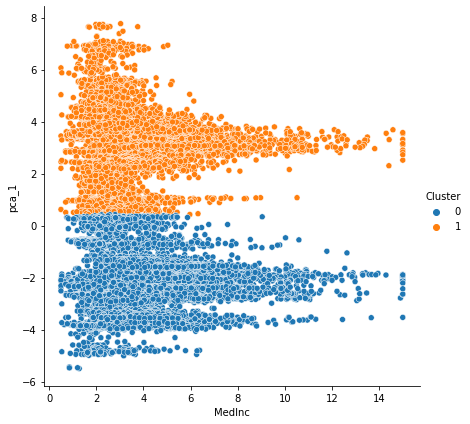

In [42]:
# Plot the first pca of latitude and longitude vs MedInc

sns.relplot(x="MedInc", y="pca_1", hue="Cluster", data=df_2, height=6)